In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug_classification.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Dataset Exploration and Preprocessing**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.isnull().sum() # No null values

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug_Type,0


In [9]:
df.duplicated().sum() # No duplicated values

0

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
df.describe(include='object')

,Sex,BP,Cholesterol,Drug_Type
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [12]:
df['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [13]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [14]:
df['Drug_Type'].value_counts()

,count
Drug_Type,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


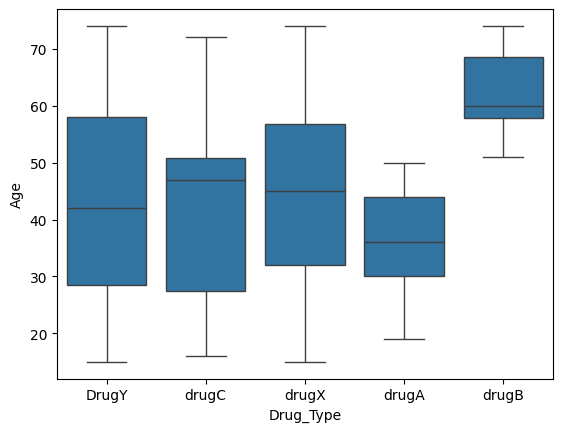

In [15]:
sns.boxplot(x='Drug_Type', y='Age', data=df)
plt.show()

In [16]:
df.groupby('Drug_Type')['Age'].mean()

,Age
Drug_Type,
DrugY,43.747253
drugA,35.869565
drugB,62.500000
drugC,42.500000
drugX,44.018519


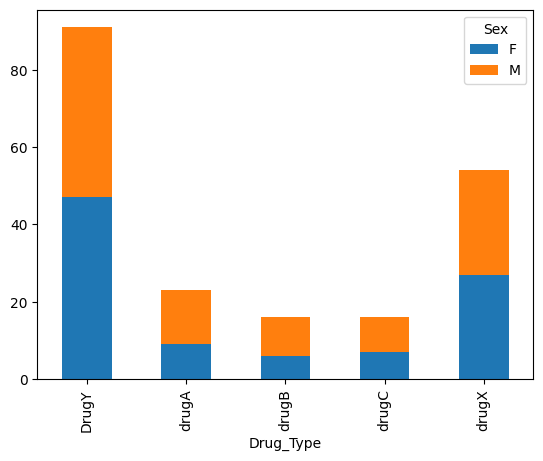

In [17]:
crosstab = pd.crosstab(df['Drug_Type'], df['Sex'])
crosstab.plot(kind='bar', stacked=True)
plt.show()

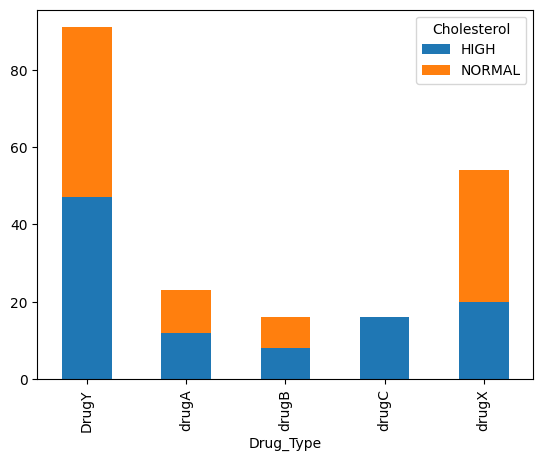

In [18]:
crosstab = pd.crosstab(df['Drug_Type'], df['Cholesterol'])
crosstab.plot(kind='bar', stacked=True)
plt.show()

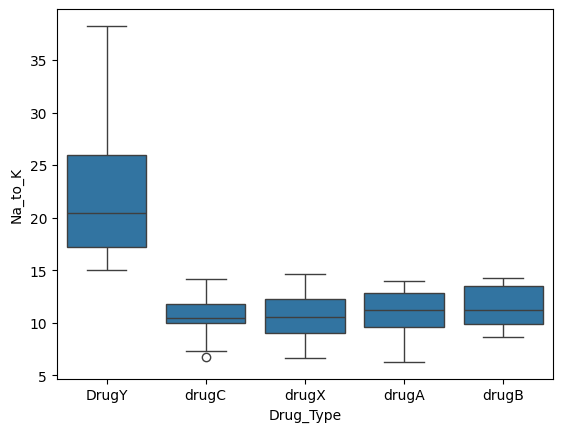

In [19]:
sns.boxplot(x='Drug_Type', y='Na_to_K', data=df)
plt.show()

In [20]:
df.groupby('Drug_Type')['Na_to_K'].mean()

,Na_to_K
Drug_Type,
DrugY,22.374780
drugA,10.918783
drugB,11.524375
drugC,10.633750
drugX,10.650556


In [50]:
scaler = StandardScaler()
df['Na_to_K'] = scaler.fit_transform(df[['Na_to_K']])

In [66]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


**Encode categorical variables**

In [67]:
categorical_columns = ['Drug_Type', 'Sex', 'BP','Cholesterol']
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [68]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type,Na_to_K_Bigger_Than_15
0,23,0,0,0,25.355,0,1
1,47,1,1,0,13.093,3,0
2,47,1,1,0,10.114,3,0
3,28,0,2,0,7.798,4,0
4,61,0,1,0,18.043,0,1


**Splitting the data**

In [69]:
X = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']
print("Shape of X: ",X.shape)
print("Shape of Y: ",y.shape)

Shape of X:  (200, 6)
Shape of Y:  (200,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

**Classification Algorithms**

In [71]:
# KNN Classifier:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN Classifier:", accuracy_knn)

Accuracy of KNN Classifier: 0.7


In [72]:
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.60      0.50      0.55         6
           2       0.33      0.67      0.44         3
           3       1.00      0.20      0.33         5
           4       0.54      0.64      0.58        11

    accuracy                           0.70        40
   macro avg       0.69      0.60      0.58        40
weighted avg       0.76      0.70      0.69        40

[[15  0  0  0  0]
 [ 0  3  0  0  3]
 [ 0  0  2  0  1]
 [ 0  1  1  1  2]
 [ 0  1  3  0  7]]


In [73]:
# Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

Accuracy of Random Forest Classifier: 0.975


In [74]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0 11]]


In [75]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression:", accuracy_lr)

Accuracy of Logistic Regression: 0.9


In [76]:
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.40      0.57         5
           4       0.77      0.91      0.83        11

    accuracy                           0.90        40
   macro avg       0.90      0.86      0.85        40
weighted avg       0.92      0.90      0.89        40

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  3]
 [ 0  0  1  0 10]]


**Hyperparameter Tuning**

In [77]:
# KNN Hyperparameter Tuning:

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)
print("Best Parameters for KNN:", grid_knn.best_params_)
y_pred_knn_tuned = grid_knn.best_estimator_.predict(X_test)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print("Accuracy with Tuned KNN:", accuracy_knn_tuned)

Best Parameters for KNN: {'n_neighbors': 7}
Accuracy with Tuned KNN: 0.675


In [78]:
# Random Forest Hyperparameter Tuning:

param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Accuracy with Tuned Random Forest:", accuracy_rf_tuned)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Tuned Random Forest: 0.975


In [79]:
# Logistic Regression Hyperparameter Tuning:
param_grid = {
'C': [0.01, 0.1, 1, 10],
'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
y_pred_lr_tuned = grid_lr.best_estimator_.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
print("Accuracy with Tuned Logistic Regression:", accuracy_lr_tuned)

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Accuracy with Tuned Logistic Regression: 0.925


**Evaluate Tuned Models**

In [80]:
print("Tuned KNN Classification Report:\n", classification_report(y_test, y_pred_knn_tuned))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("Tuned Logistic Regression Classification Report:\n",classification_report(y_test, y_pred_lr_tuned))

Tuned KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.60      0.50      0.55         6
           2       0.20      0.33      0.25         3
           3       1.00      0.20      0.33         5
           4       0.54      0.64      0.58        11

    accuracy                           0.68        40
   macro avg       0.66      0.53      0.54        40
weighted avg       0.73      0.68      0.67        40

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40

**Discussion**

**KNN (k-Nearest Neighbors)**

Accuracy: 68%

Details:

Works well for DrugY but struggles with other drug types, especially DrugX and DrugA.

KNN finds it hard to handle differences in class sizes (e.g., fewer samples for some drugs) and feature scaling.

**Random Forest**


Accuracy: 97%


Details:

Performs nearly perfectly for all drug types.

Handles both numbers and categories well and is less likely to overfit because it uses multiple decision trees.

**Logistic Regression**

Accuracy: 93%

Details:
Works well for most drug types but struggles slightly with DrugA (low recall of 40%).

Assumes a straight-line relationship between features, which might not match the real patterns in your data.
